In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt
import scipy.sparse as sparse
import spacy
import seaborn as sns
nlp = spacy.load('en')

In [3]:
pet = pd.read_json('/Users/harishprabhala/Downloads/Pet_Supplies_5.json', lines=True)

In [4]:
pet.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,1223000893,"[0, 0]",3,I purchased the Trilogy with hoping my two cat...,"01 12, 2011",A14CK12J7C7JRK,Consumer in NorCal,Nice Distraction for my cats for about 15 minutes,1294790400
1,1223000893,"[0, 0]",5,There are usually one or more of my cats watch...,"09 14, 2013",A39QHP5WLON5HV,Melodee Placial,Entertaining for my cats,1379116800
2,1223000893,"[0, 0]",4,I bought the triliogy and have tested out all ...,"12 19, 2012",A2CR37UY3VR7BN,Michelle Ashbery,Entertaining,1355875200
3,1223000893,"[2, 2]",4,My female kitty could care less about these vi...,"05 12, 2011",A2A4COGL9VW2HY,Michelle P,Happy to have them,1305158400
4,1223000893,"[6, 7]",3,"If I had gotten just volume two, I would have ...","03 5, 2012",A2UBQA85NIGLHA,"Tim Isenhour ""Timbo""",You really only need vol 2,1330905600


In [5]:
pet = pet[['overall','reviewText']]

In [6]:
pet.isnull().sum()

overall       0
reviewText    0
dtype: int64

In [7]:
pet['reviewText'].head()

0    I purchased the Trilogy with hoping my two cat...
1    There are usually one or more of my cats watch...
2    I bought the triliogy and have tested out all ...
3    My female kitty could care less about these vi...
4    If I had gotten just volume two, I would have ...
Name: reviewText, dtype: object

In [8]:
pet.head()

,overall,reviewText
0,3,I purchased the Trilogy with hoping my two cat...
1,5,There are usually one or more of my cats watch...
2,4,I bought the triliogy and have tested out all ...
3,4,My female kitty could care less about these vi...
4,3,"If I had gotten just volume two, I would have ..."


In [9]:
pet['overall'].mean()

4.229744798398338

In [10]:
pet.groupby('overall')['reviewText'].count()

overall
1     8748
2     8907
3    15933
4    27995
5    96253
Name: reviewText, dtype: int64

In [11]:
pet["overall"] = pet["overall"].apply(lambda x: '1' if x > 3 else '0') 

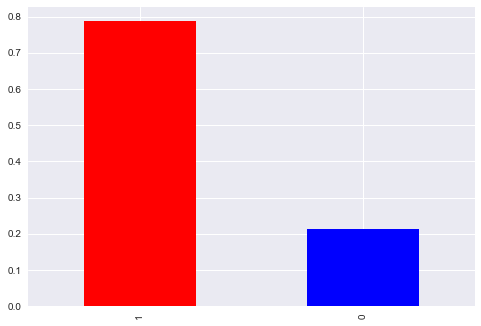

In [12]:
pet['overall'].value_counts('1').plot(kind='Bar', color=['r','b'])

In [13]:
pet['overall'].value_counts('1')*100

1    78.719684
0    21.280316
Name: overall, dtype: float64

In [14]:
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import RegexpTokenizer

nlp = spacy.load('en')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/harishprabhala/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
stop = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

In [16]:
tokens = pet["reviewText"].apply(nltk.word_tokenize)

In [17]:
tokens.count()

157836

In [18]:
tokens.head()

0    [I, purchased, the, Trilogy, with, hoping, my,...
1    [There, are, usually, one, or, more, of, my, c...
2    [I, bought, the, triliogy, and, have, tested, ...
3    [My, female, kitty, could, care, less, about, ...
4    [If, I, had, gotten, just, volume, two, ,, I, ...
Name: reviewText, dtype: object

In [19]:
def preprocess (eachline):
    sentence = eachline.lower()
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(sentence)
    stop_words = (w for w in tokens if not w in stop)
    clean_words =(w for w in tokens if not w.isnumeric())
    stemmed = [w for w in tokens if lemmatizer.lemmatize(w)] 
    return ' '.join(stemmed)

In [20]:
cleaned_reviews = []
for w in pet['reviewText']:
    cleaned_reviews.append(preprocess(w))

In [21]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn import linear_model
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

/Users/harishprabhala/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvectorizer = TfidfVectorizer()
Xtfidf=tfidfvectorizer.fit_transform(cleaned_reviews)

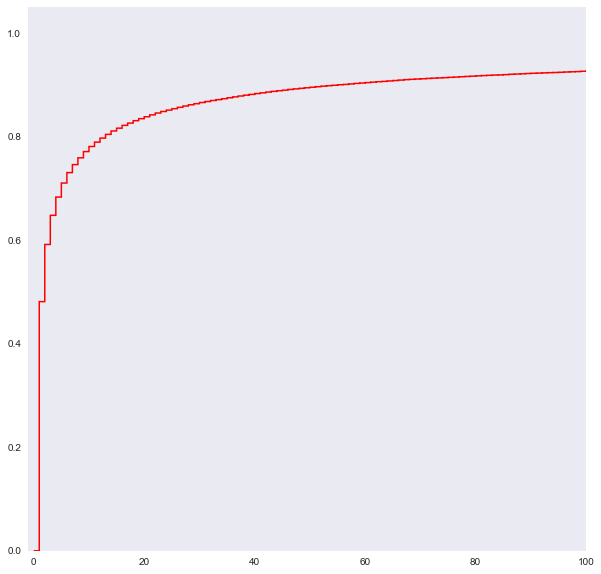

In [23]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
df = list((Xtfidf > 0).sum(0).tolist()[0])
c = pd.Series(df)
y = np.arange(c.sum())
plt.hist(c,y,normed=1, histtype='step', color='r', cumulative=True, linewidth=1.5, )
plt.xlim(-1,100)
plt.grid()

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvectorizer1 = TfidfVectorizer(min_df=10, stop_words='english')
X_clean=tfidfvectorizer1.fit_transform(cleaned_reviews)
y_clean = (pet.overall)

In [25]:
idf = tfidfvectorizer1.idf_
idf_score =(dict(zip(tfidfvectorizer1.get_feature_names(), idf)))

In [26]:
a = pd.DataFrame.from_dict(idf_score, orient='index')

In [27]:
a.columns = ['Score']

In [28]:
a.sort_values('Score', ascending=False).head(10)

,Score
socializing,10.571423
gurgle,10.571423
hays,10.571423
thickly,10.571423
hawks,10.571423
hats,10.571423
soother,10.571423
appreciation,10.571423
hardening,10.571423
visualize,10.571423


In [29]:
Xcl_train, Xcl_test, ycl_train, ycl_test = train_test_split(X_clean,y_clean)

In [30]:
Xcl_train.shape, ycl_train.shape, Xcl_test.shape, ycl_test.shape

((118377, 15920), (118377,), (39459, 15920), (39459,))

In [31]:
clf=MultinomialNB()
clf.fit(Xcl_train,ycl_train)
ycl_pred = clf.predict(Xcl_test)
print ('Accuracy of test data: ',(accuracy_score(clf.predict(Xcl_test), ycl_test)))
print ('Accuracy of training data: ',(accuracy_score(clf.predict(Xcl_train), ycl_train)))
print("\n")
print ('Classification report summary of MultinomialDB:')
print (classification_report(ycl_test, ycl_pred))

Accuracy of test data:  0.805773080919
Accuracy of training data:  0.811804657999


Classification report summary of MultinomialDB:
             precision    recall  f1-score   support

          0       0.87      0.10      0.19      8410
          1       0.80      1.00      0.89     31049

avg / total       0.82      0.81      0.74     39459



In [90]:
from sklearn.cross_validation import StratifiedKFold

In [96]:
kf = StratifiedKFold(y_clean,n_folds=5, shuffle=True)
for train, test in kf:
    X1cl_train, X1cl_test = X_clean[train], X_clean[test]
    y1cl_train, y1cl_test = y_clean[train], y_clean[test]

In [97]:
clf=MultinomialNB(alpha=0.01)
clf.fit(X1cl_train,y1cl_train)
print ('Accuracy of test data: ',(accuracy_score(clf.predict(X1cl_test), y1cl_test)))
print ('Accuracy of training data: ',(accuracy_score(clf.predict(X1cl_train), y1cl_train)))
print("\n")
print ('Classification report summary of MultinomialDB with alpha = 0.01:')
print(classification_report(clf.predict(X1cl_test), y1cl_test))

Accuracy of test data:  0.814230501172
Accuracy of training data:  0.823030015047


Classification report summary of MultinomialDB with alpha = 0.01:
             precision    recall  f1-score   support

          0       0.15      0.88      0.25      1135
          1       0.99      0.81      0.89     30431

avg / total       0.96      0.81      0.87     31566



In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn import grid_search
from sklearn.model_selection import GridSearchCV

/Users/harishprabhala/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [35]:
Cs = [0.001, 0.1, 1, 10, 100]
parameters = {'C':Cs}
log = LogisticRegression()
clf2 = grid_search.GridSearchCV(log, parameters)

In [36]:
samplex = X1cl_train[:80000]
sampley = y1cl_train[:80000]

In [37]:
clf2.fit(samplex,sampley)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, scoring=None, verbose=0)

In [38]:
clf2.best_params_

{'C': 1}

In [87]:
logit=LogisticRegression(C=1)
logit.fit(X1cl_train,y1cl_train)
print ('Accuracy of test data: ',(accuracy_score(logit.predict(X1cl_test), y1cl_test)))
print ('Accuracy of training data: ',(accuracy_score(logit.predict(X1cl_train), y1cl_train)))
print("\n")
print ('Classification report summary of Logistic Regression C=1:')
print(classification_report(logit.predict(X1cl_test), y1cl_test))

Accuracy of test data:  0.859754165875
Accuracy of training data:  0.875203928091


Classification report summary of Logistic Regression C=1:
             precision    recall  f1-score   support

          0       0.50      0.76      0.60      4388
          1       0.96      0.88      0.91     27178

avg / total       0.89      0.86      0.87     31566



In [40]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [88]:
dtree=DecisionTreeClassifier(max_depth=20)
dtree.fit(X1cl_train,y1cl_train)
print ('Accuracy of test data: ',(accuracy_score(dtree.predict(X1cl_test), y1cl_test)))
print ('Accuracy of training data: ',(accuracy_score(dtree.predict(X1cl_train), y1cl_train)))
print("\n")
print ('Classification report summary of Decision Tree:')
print(classification_report(dtree.predict(X1cl_test), y1cl_test))

Accuracy of test data:  0.802477349046
Accuracy of training data:  0.84059554922


Classification report summary of Decision Tree:
             precision    recall  f1-score   support

          0       0.23      0.59      0.33      2580
          1       0.96      0.82      0.88     28986

avg / total       0.90      0.80      0.84     31566



In [ ]:
from gensim.models import Phrases
from gensim.models.word2vec import LineSentence
from gensim.corpora import Dictionary, MmCorpus
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora, models

import pyLDAvis
import pyLDAvis.gensim

In [ ]:
bigram = Phrases(final_words, min_count=1, threshold=2)

In [ ]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [ ]:
finder = BigramCollocationFinder.from_words(final_words)
finder.nbest(bigram_measures.chi_sq, 30)

In [ ]:
final_words_unic = []
for i in final_words:
    final_words_unic.append(bytes(str(i).encode('utf-8')))    

In [ ]:
#dictionary = corpora.Dictionary(final_words_unic)
#doc_term_matrix = [dictionary.doc2bow(doc) for doc in final_words_unicode]

In [ ]:
#rev = vectorizer.transform(['This movie is not remarkable, touching, or superb in any way'])
#clf1.predict(rev)